## Loan Approval Prediction Analysis

**Task:** Predict whether an applicant is approved for a loan. 

**Evaluation:** Evaluated using the Area under ROC Curve (AUC-ROC), a metric that effective measures the ability to distinguish between approved and non-approves applicants. 

**Proposal:** Use data clearning, EDA, Data visualization and statistics analysis to gain insights into loan approval patterns, and apply machine learning to preduct loan approval status. 

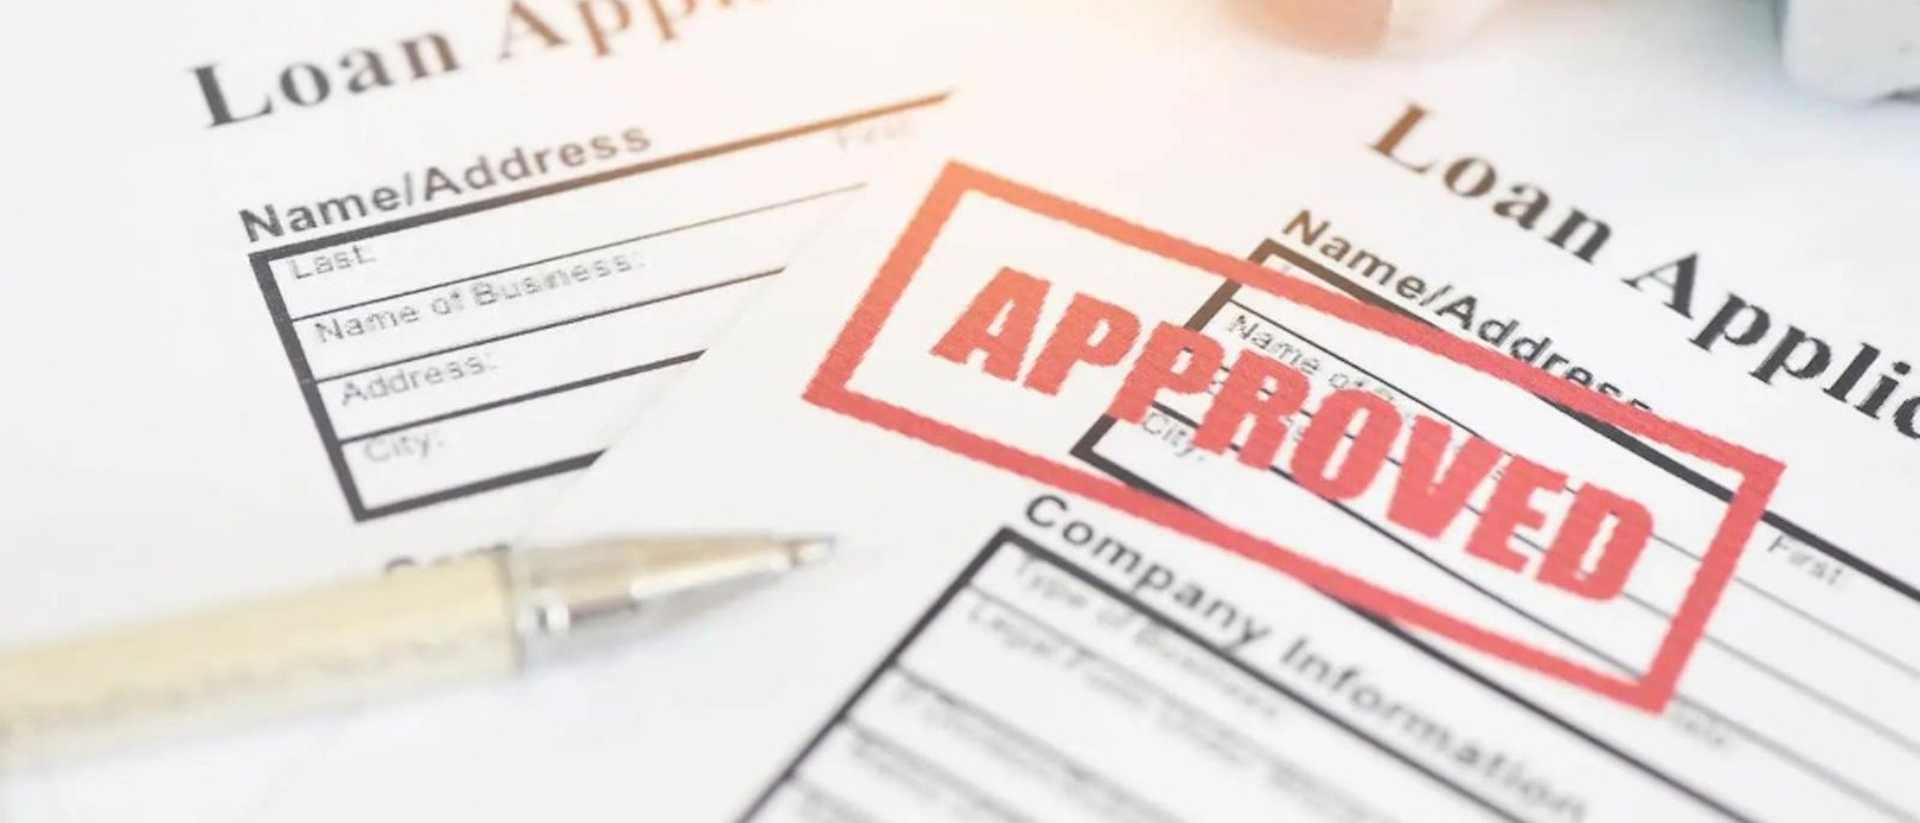

### About the data 
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [2]:
df_test= pd.read_csv('/Users/laiyeung/Downloads/playground-series-s4e10/test.csv', index_col=0)
df_train  = pd.read_csv('/Users/laiyeung/Downloads/playground-series-s4e10/train.csv', index_col=0)
df_sub = pd.read_csv('/Users/laiyeung/Downloads/playground-series-s4e10/sample_submission.csv')
df_orig = pd.read_csv('/Users/laiyeung/Downloads/playground-series-s4e10/credit_risk_dataset.csv')

In [3]:
print('The dimension of the train dataset is:', df_train.shape)
print('The dimension of the test dataset is:', df_test.shape)
print('The dimension of the original dataset is:', df_orig.shape)

The dimension of the train dataset is: (58645, 12)
The dimension of the test dataset is: (39098, 11)
The dimension of the original dataset is: (32581, 12)


In [25]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [26]:
df_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
id,,,,,,,,,,,
58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [27]:
print('--- Train ---\n')
print(df_train.isnull().sum())


--- Train ---

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [29]:
print('--- Test ---\n')
df_test.isnull().sum()

--- Test ---



person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39098 entries, 58645 to 97742
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.6+ MB


### EDA

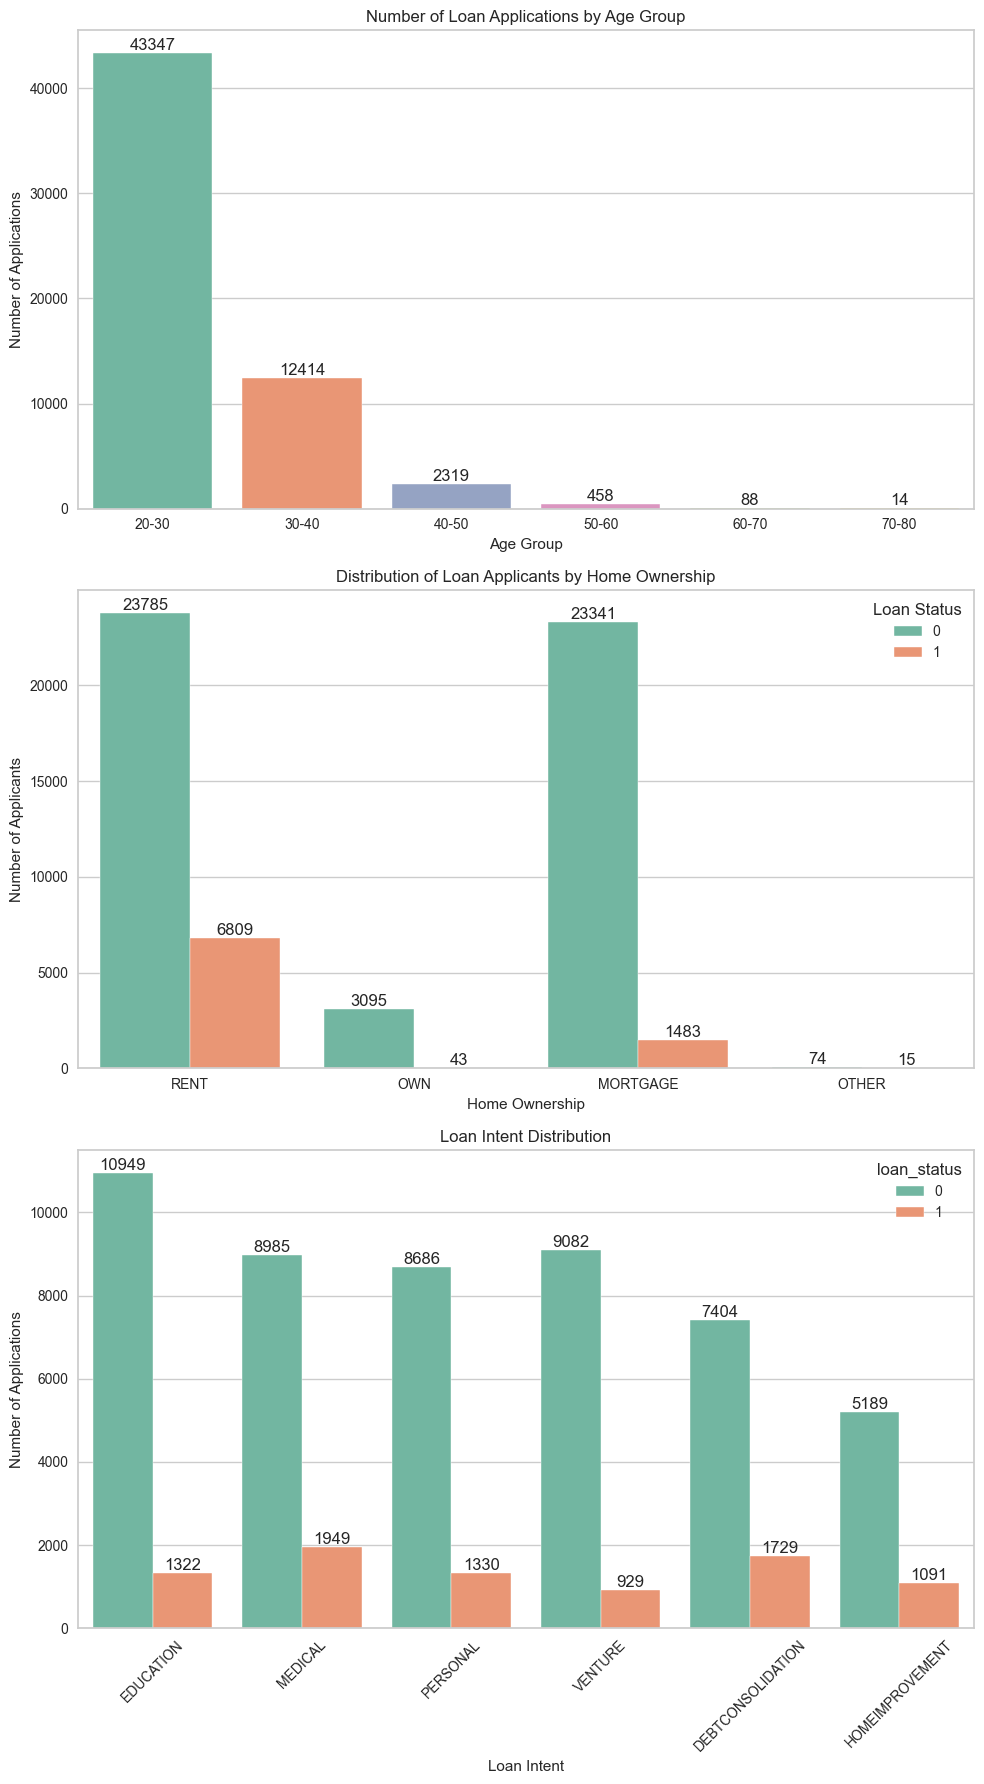

In [31]:
sns.set_style("whitegrid")
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df_train['age_group'] = pd.cut(df_train['person_age'], bins=age_bins, labels=age_labels, right=False)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18), tight_layout=True)

# Plot 1: Number of Loan Applications by Age Group
sns.countplot(data=df_train, x='age_group', order=age_labels, palette='Set2', ax=axes[0])
axes[0].set_title('Number of Loan Applications by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Applications')

# Adding counts on top of bars for Plot 1
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom')

# Plot 2: Distribution of Loan Applicants by Home Ownership
sns.countplot(data=df_train, x='person_home_ownership', hue='loan_status', palette='Set2', ax=axes[1])
axes[1].set_title('Distribution of Loan Applicants by Home Ownership')
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('Number of Applicants')
axes[1].legend(title='Loan Status')

# Adding counts on top of bars for Plot 2
for p in axes[1].patches:
    if p.get_height() > 0:  # Only annotate if height (count) is greater than zero
        axes[1].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center',va='bottom')

# Plot 3: Loan Intent Distribution
sns.countplot(data=df_train, x='loan_intent', hue='loan_status', palette='Set2', ax=axes[2])
axes[2].set_title('Loan Intent Distribution')
axes[2].set_xlabel('Loan Intent')
axes[2].set_ylabel('Number of Applications')
axes[2].tick_params(axis='x', rotation=45)

# Adding counts on top of bars for Plot 3
for p in axes[2].patches:
    if p.get_height() > 0:
        axes[2].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center',va='bottom')

plt.show()


The 'Loan Applications by Age Group' plot shows the distribution of loan applications across different age groups, with those aged 20-30 being the most active in seeking loans. This insight can help us tailor loan products and marketing strategies based on age.

Trends in 'Home Ownership with Loan Approval' indicate that applicants with certain homeownership statuses are more likely to have loans approved or denied.

In the 'Loan Intent Distribution,' the most common reason for seeking loans is 'Education,' highlighting an area where financial support is frequently needed. 

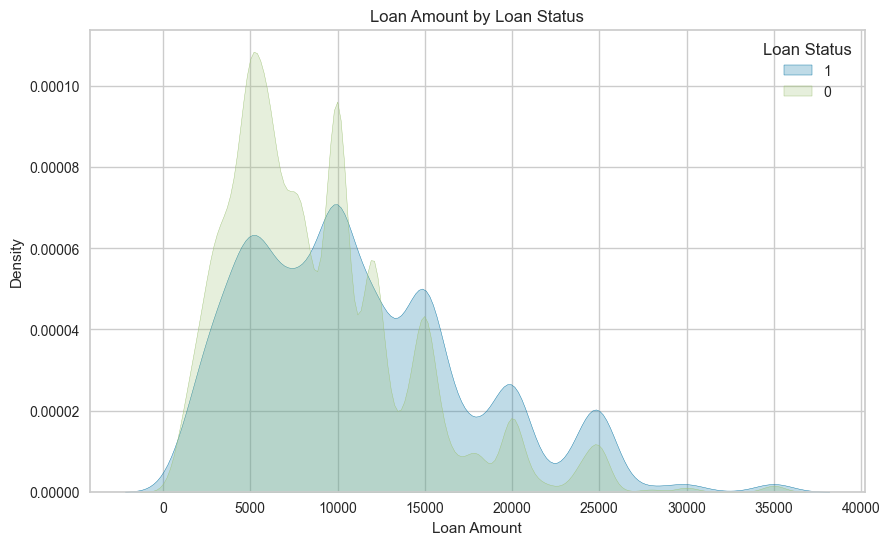

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'], fill=True, label="1")
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'], fill=True, label="0")
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend(title="Loan Status")  
plt.show()


Approved loans are generally centered around mid-sized loan amounts, suggesting that higher loan amounts undergo more stringent review.

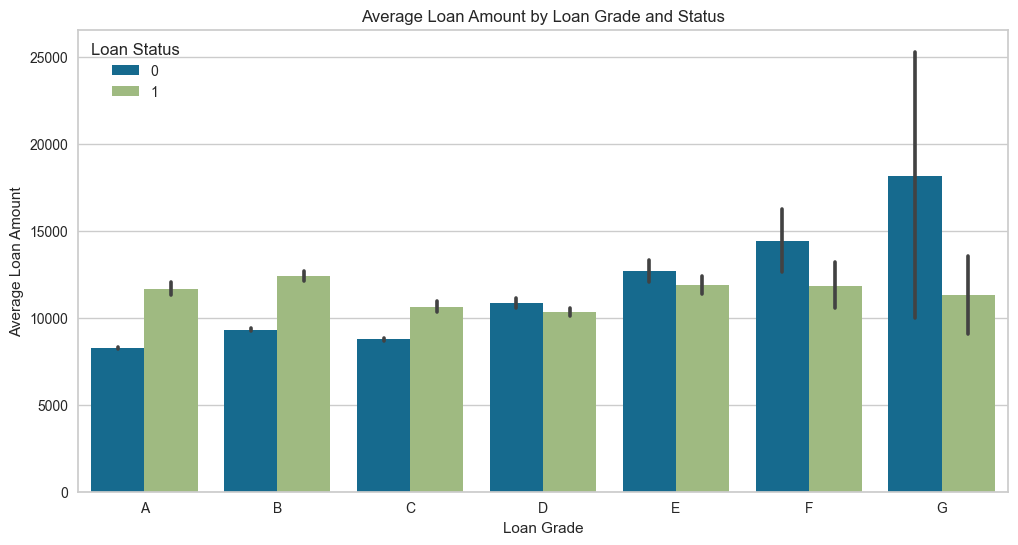

In [10]:
loan_grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=df_train, estimator=np.mean, order=loan_grade_order)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()


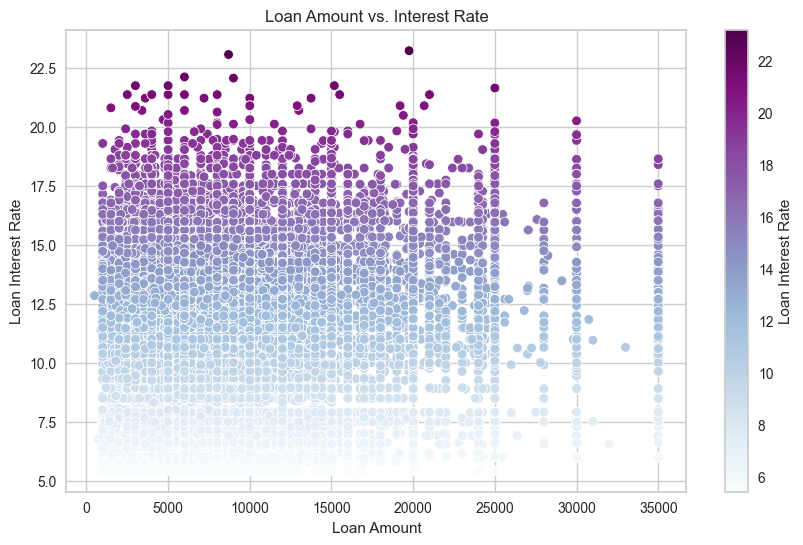

In [34]:
plt.figure(figsize=(10, 6))

# Use Seaborn to create the scatter plot with hue for color differentiation
scatter = sns.scatterplot(
    data=df_train, 
    x='loan_amnt', 
    y='loan_int_rate', 
    hue='loan_int_rate', 
    palette="BuPu", 
    legend=False
)

# Add color bar
norm = plt.Normalize(df_train['loan_int_rate'].min(), df_train['loan_int_rate'].max())
sm = plt.cm.ScalarMappable(cmap="BuPu", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Loan Interest Rate')

# Set plot title and labels
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Interest Rate')

plt.show()


This scatter plot show the positive correlation between loan amount and interest rate suggests that larger loan amounts are perceived as riskier by lenders, hence the higher interest rates to offset potential risk. This insight could be used to identify loan ranges that might require more detailed credit evaluations or adjusted interest rates based on applicant profiles.

### Correlation

In [ ]:
df_train['person_home_ownership'] = df_train['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3})
df_train['loan_intent'] = df_train['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5})
df_train['loan_grade'] = df_train['loan_grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
df_train['cb_person_default_on_file'] = df_train['cb_person_default_on_file'].replace({'N': 0, 'Y': 1})
df_train["loantoincome"] = (((df_train["loan_amnt"] / df_train["person_income"])) * 1000000).astype(int)
df_train.drop(columns=['age_group'], inplace=True)
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loantoincome
id,,,,,,,,,,,,,
0,37,35000,0,0.0,0,1,6000,11.49,0.17,0,14,0,171428
1,22,56000,2,6.0,1,2,4000,13.35,0.07,0,2,0,71428
2,29,28800,2,8.0,2,0,6000,8.90,0.21,0,10,0,208333
3,30,70000,0,14.0,3,1,12000,11.11,0.17,0,5,0,171428
4,22,60000,0,2.0,1,0,6000,6.92,0.10,0,3,0,100000


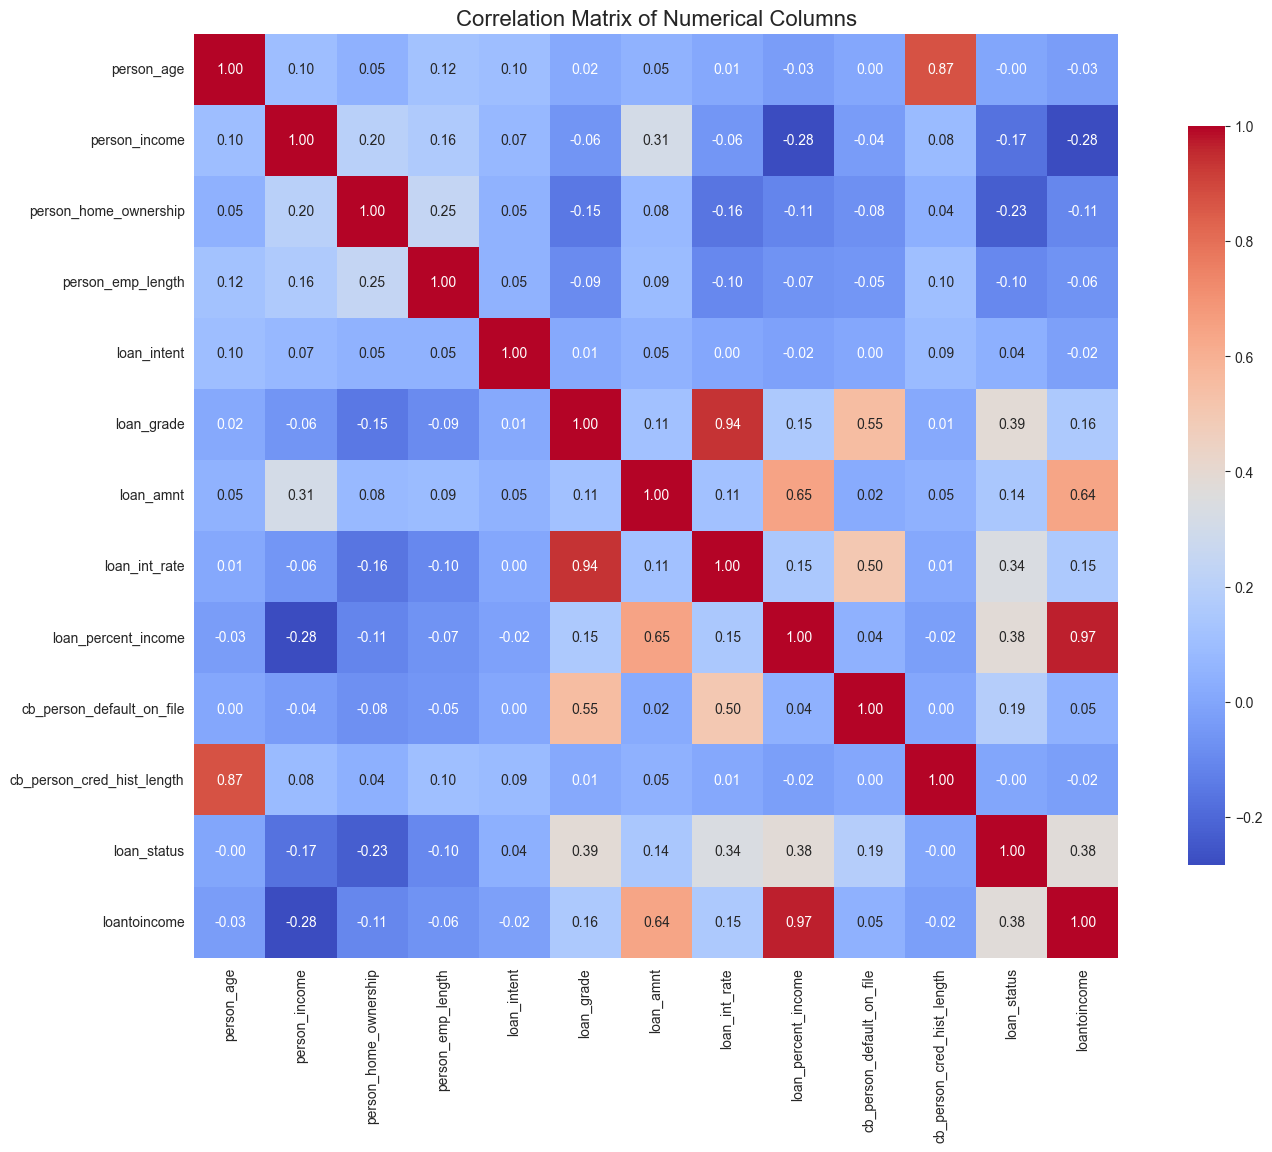

In [ ]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(18, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Numerical Columns', fontsize=16)
plt.show()

### Statistical Tests 



In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_home_ownership,58645.0,0.534862,0.604081,0.00,0.00,0.00,1.00,3.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_intent,58645.0,2.198499,1.655736,0.00,1.00,2.00,4.00,5.00
loan_grade,58645.0,1.066638,1.046181,0.00,0.00,1.00,2.00,6.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_default_on_file,58645.0,0.148384,0.355484,0.00,0.00,0.00,0.00,1.00


### Modeling 

In [8]:
df_train.select_dtypes('object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
id,,,,
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
58640,MORTGAGE,EDUCATION,D,Y
58641,RENT,MEDICAL,C,N
58642,RENT,EDUCATION,D,N


In [9]:
x=df_train.drop('loan_status',axis=1)
y=df_train['loan_status']

In [10]:
le=LabelEncoder()
for col in x.select_dtypes('object').columns:
    x[col]=le.fit_transform(x[col])

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
models = {
    'Linear_Regression':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'Random Forest': RandomForestClassifier(),
    'XGB':XGBRegressor(),
    'SVM':SVC()
}

In [13]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

 
    accuracy = accuracy_score(y_test, obj_pred>0.5)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')

  
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)


print(results_df)

               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.889249   0.881539  0.889249  0.864612
1                KNN  0.893597   0.885885  0.893597  0.888510
2       DecisionTree  0.910734   0.912562  0.910734  0.911586
3      Random Forest  0.950038   0.948908  0.950038  0.947214
4                XGB  0.952767   0.951642  0.952767  0.950415
5                SVM  0.860005   0.739609  0.860005  0.795276


In [14]:
model =RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Classification Report :" , classification_report(y_pred,y_test))

Classification Report :               precision    recall  f1-score   support

           0       0.99      0.95      0.97     10474
           1       0.70      0.92      0.79      1255

    accuracy                           0.95     11729
   macro avg       0.84      0.93      0.88     11729
weighted avg       0.96      0.95      0.95     11729



In [16]:
df_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
id,,,,,,,,,,,
58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [17]:
df_test.select_dtypes('object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
id,,,,
58645,RENT,HOMEIMPROVEMENT,F,N
58646,MORTGAGE,PERSONAL,C,Y
58647,RENT,VENTURE,E,Y
58648,RENT,DEBTCONSOLIDATION,A,N
58649,MORTGAGE,HOMEIMPROVEMENT,D,Y
...,...,...,...,...
97738,MORTGAGE,DEBTCONSOLIDATION,B,N
97739,MORTGAGE,EDUCATION,A,N
97740,MORTGAGE,PERSONAL,A,N


In [ ]:
for col in df_test.select_dtypes('object').columns:
    df_test[col]=le.fit_transform(df_test[col])

In [33]:
x_test=df_test

In [34]:
test_predictions = model.predict(x_test)

test_pred_proba = model.predict_proba(x_test)[:, 0]

In [35]:
df_sub['loan_status'] = test_pred_proba

In [ ]:
df_sub.to_csv('submission.csv', index=False)
print("File Saved.")

File Saved.


In [ ]:
df_sub.head()

,id,loan_status
0,58645,0.05
1,58646,0.98
2,58647,0.31
3,58648,0.97
4,58649,0.92
...,...,...
39093,97738,0.99
39094,97739,1.00
39095,97740,0.99
39096,97741,0.69
